In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


In [7]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [8]:
data_test = data[data['Date']> '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
...,...,...,...,...,...,...,...
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [11]:
X_train = []
Y_train = []

In [12]:
training_data.shape[0]

1932

In [13]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
X_train.shape

(1872, 60, 5)

# Building LSTM

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [78]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [79]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [80]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 120)              

In [82]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [97]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
38/38 [==============================] - 6s 148ms/step - loss: 0.0018
Epoch 2/20
38/38 [==============================] - 5s 141ms/step - loss: 0.0017
Epoch 3/20
38/38 [==============================] - 6s 151ms/step - loss: 0.0018
Epoch 4/20
38/38 [==============================] - 6s 169ms/step - loss: 0.0020
Epoch 5/20
38/38 [==============================] - 7s 184ms/step - loss: 0.0017
Epoch 6/20
38/38 [==============================] - 6s 149ms/step - loss: 0.0016
Epoch 7/20
38/38 [==============================] - 6s 147ms/step - loss: 0.0016
Epoch 8/20
38/38 [==============================] - 7s 175ms/step - loss: 0.0016
Epoch 9/20
38/38 [==============================] - 6s 166ms/step - loss: 0.0017
Epoch 10/20
38/38 [==============================] - 6s 152ms/step - loss: 0.0017
Epoch 11/20
38/38 [==============================] - 6s 151ms/step - loss: 0.0016
Epoch 12/20
38/38 [==============================] - 7s 188ms/step - loss: 0.0017
Epoch 13/20
38/38 [======

 # Test Dataset

In [100]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [101]:
inputs = scaler.transform(df)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, 0.47344448, 0.47088353],
       [0.47401087, 0.46123417, 0.47704822, 0.46881889, 0.4684344 ],
       [0.4693899 , 0.46753509, 0.47971984, 0.47799406, 0.58014293],
       ...,
       [0.44609842, 0.43966175, 0.45462663, 0.45181931, 0.69362236],
       [       nan,        nan,        nan,        nan,        nan],
       [0.44858819, 0.43506214, 0.46071565, 0.44922869, 0.64608693]])

In [102]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [103]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((147, 60, 5), (147,))

In [104]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.33222204],
        [0.33067423],
        [0.3300987 ],
        [0.32950842],
        [0.32959914],
        [0.33210015],
        [0.33979833],
        [0.35222936],
        [0.36205846],
        [0.3687042 ],
        [0.37212318],
        [0.37260526],
        [0.37161416],
        [0.37809885],
        [0.38943133],
        [0.39754272],
        [0.40306145],
        [0.40565163],
        [0.40642768],
        [0.40333158],
        [0.39764762],
        [0.39164567],
        [0.3870269 ],
        [0.38332552],
        [0.37950993],
        [0.3773709 ],
        [0.38074654],
        [0.39203656],
        [0.4063325 ],
        [0.41987926],
        [0.42887574],
        [0.43211204],
        [0.4328301 ],
        [0.43232703],
        [0.43006158],
        [0.42968714],
        [0.43324727],
        [0.4380203 ],
        [0.4424796 ],
        [0.44719243],
        [0.45237428],
        [0.45607632],
        [0.46191502],
        [0.4693219 ],
        [0.47267473],
        [0

In [105]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [106]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [107]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [108]:
Y_pred


array([[6411.5215],
       [6381.6504],
       [6370.543 ],
       [6359.1514],
       [6360.9023],
       [6409.169 ],
       [6557.7354],
       [6797.6406],
       [6987.3315],
       [7115.587 ],
       [7181.57  ],
       [7190.8735],
       [7171.746 ],
       [7296.8936],
       [7515.598 ],
       [7672.1387],
       [7778.6445],
       [7828.632 ],
       [7843.609 ],
       [7783.8574],
       [7674.1636],
       [7558.3325],
       [7469.1953],
       [7397.7627],
       [7324.126 ],
       [7282.8447],
       [7347.991 ],
       [7565.876 ],
       [7841.772 ],
       [8103.2095],
       [8276.832 ],
       [8339.289 ],
       [8353.146 ],
       [8343.438 ],
       [8299.717 ],
       [8292.491 ],
       [8361.197 ],
       [8453.312 ],
       [8539.372 ],
       [8630.324 ],
       [8730.328 ],
       [8801.773 ],
       [8914.454 ],
       [9057.398 ],
       [9122.1045],
       [9099.697 ],
       [9003.331 ],
       [8872.797 ],
       [8756.158 ],
       [8658.126 ],


In [95]:
Y_test

array([ 7025.65427061,  6807.5317115 ,  7168.47848868,  7233.55466072,
        7233.55514872,  7591.7851299 ,  7985.0385481 ,  7905.39889906,
        7701.41061796,  7985.2939191 ,  7856.36472004,  8012.87497412,
        7964.03610609,  8648.44675144,  8635.58444644,  8548.31296239,
        8750.31491549,  8764.5483145 ,  8527.73483738,  8482.09421236,
        8567.3139394 ,  8503.75339237,  8228.67038423,  8263.22214224,
        8187.51315721,  8420.41159533,  8735.62741549,  9180.57370472,
        9139.11960369,  9331.41647879,  9169.46042371,  9212.92331473,
        9167.78659571,  9115.94479868,  9006.51901763,  9440.92429085,
        9549.1059319 ,  9616.17331494,  9686.99753298,  9938.6625721 ,
        9678.99460397, 10025.49069715, 10147.06394021, 10034.65378315,
       10136.95944721,  9712.28268999,  9759.66354901,  9514.33347089,
        9966.90183012,  9452.42819686,  9434.88522885,  9510.81003289,
        9486.42136087,  9744.68601001,  9474.41550187,  9161.39304071,
      

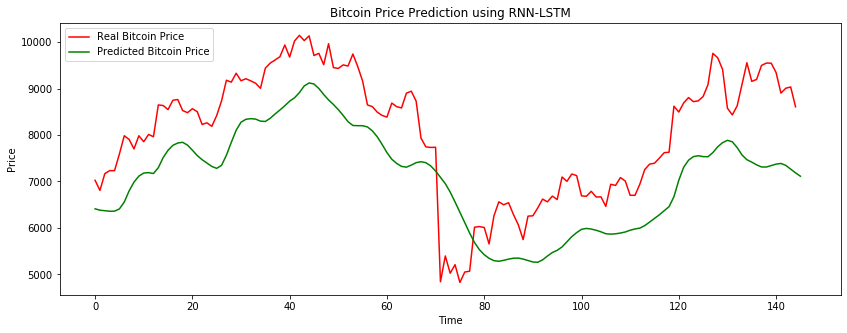

In [109]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()